# Small Clustering Project

## Imports and data set

In [1]:
# import everything we need

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# read the csv file and print the first few lines
df = pd.read_csv("data/Kunden_EKZ.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Profiling

In [3]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import pandas_profiling
from pandas_profiling import ProfileReport

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
ProfileReport(df)

It is recommended to leave out the column Annual Income, because there is a high correlation with CustomerID. However, I will omit CustomerID instead and include AnnualIncome, since these values contain information at all and do not simply count up from 1-x.

CustomerID is still included in the further process, but is ignored in the next step (standardising).

## Preparing and improving data

In [7]:
#Rename columns e.g. remove spaces
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']

In [8]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#Set CustomerID as index
df.set_index('CustomerID', inplace=True)

In [10]:
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
#See if the data contains missing values
df.isnull().values.any()

False

One problem is how to deal with the nominal data (gender). You cannot calculate the distance and you cannot sort the data.

In [12]:
#convert nominal data (gender) into numbers to perform machine learning
#so-called "dummy variables" must be created

prepdf = pd.get_dummies(df[['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)']])
prepdf.head()

,Age,Annual_Income_(k$),Spending_Score_(1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


As one can see, gender was not only converted to e.g. Male->0 and Female->1, but two columns were created to show the gender. Why?
If we simply replace Male as 0 and Female as 1, we would make a classic mistake. Because the algorithm would now assume that Female is larger than Male (which cannot be said because the data is not sortable). 
A workaround is to create these so-called dummy features. This can be done with OneHotEncoding or get_dummies(). I used get_dummies() because it automatically detects which columns are strings and creates dummy features for them.


### Standardising

Standardisation of the data is important in order to achieve an equal "weighting" of the data. For example, if the data for height differ slightly but the data for body weight do, the ML algorithm will interpret one metre difference in height as more important than one kilogram of weight. Therefore, the values are rescaled to a standard normal distribution with expected value = 0 and standard deviation = 1.

In [13]:
#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train)
#X_test_std = stdsc.transform(X_test)

In [14]:
features = ['Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)', 'Gender_Female', 'Gender_Male']
#select features
x = prepdf.loc[:, features].values

#standardising
x = StandardScaler().fit_transform(x)

In [15]:
print(x)

[[-1.42456879 -1.73899919 -0.43480148 -1.12815215  1.12815215]
 [-1.28103541 -1.73899919  1.19570407 -1.12815215  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298  0.88640526 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783  0.88640526 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992  0.88640526 -0.88640526]
 [-1.20926872 -1.66266033  1.00159627  0.88640526 -0.88640526]
 [-0.27630176 -1.62449091 -1.71591298  0.88640526 -0.88640526]
 [-1.13750203 -1.62449091  1.70038436  0.88640526 -0.88640526]
 [ 1.80493225 -1.58632148 -1.83237767 -1.12815215  1.12815215]
 [-0.6351352  -1.58632148  0.84631002  0.88640526 -0.88640526]
 [ 2.02023231 -1.58632148 -1.4053405  -1.12815215  1.12815215]
 [-0.27630176 -1.58632148  1.89449216  0.88640526 -0.88640526]
 [ 1.37433211 -1.54815205 -1.36651894  0.88640526 -0.88640526]
 [-1.06573534 -1.54815205  1.04041783  0.88640526 -0.88640526]
 [-0.13276838 -1.54815205 -1.44416206 -1.12815215  1.12815215]
 [-1.20926872 -1.54815205  1.11806095 -1.12815215  1.12

The values have now been standardised.

## Principal Component Analysis (PCA)

We have 5 dimensions, which are now reduced to 2 dimensions by PCA. Why? 2 dimensions can be visualised and the algorithm needs less time.

In [16]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

pcaDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [17]:
pcaDF.head()

,PC1,PC2
0,1.321908,-0.782594
1,1.150019,-1.816813
2,-1.320033,0.607360
3,-1.613849,-1.159959
4,-1.376544,0.234457


As you can see: The 5 dimensions have been reduced to 2, which explain most of the variance.
Plot:

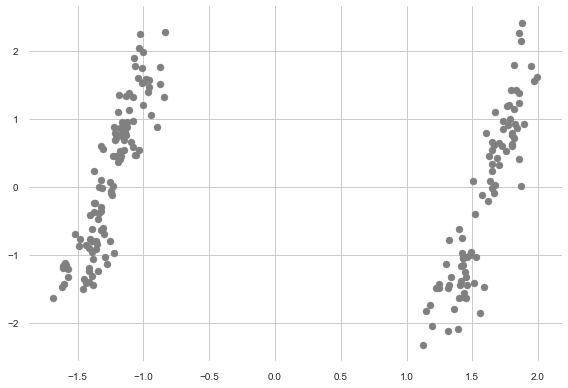

In [18]:
Z = pcaDF.values
plt.scatter(Z[:,0], Z[:,1], c='grey', marker='o', s=50)
plt.tight_layout()
plt.grid()
plt.show()

# Clustering

Using the Elbow method, I can see what the optimal number of clusters is.

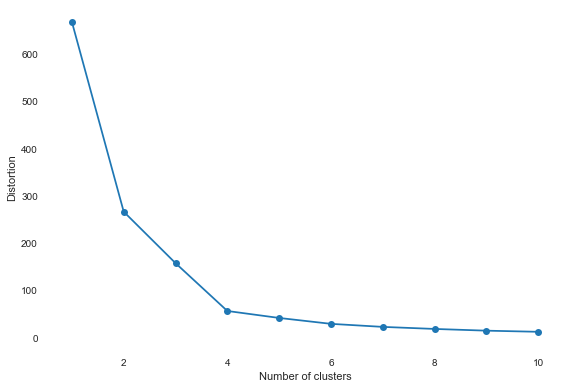

In [19]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(Z)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Result: 4 clusters should be selected.

In [20]:
#Clustering mit 4 Clustern vornehmen
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
#Labels in y_km speichern
y_km = km.fit_predict(Z)

Plot:

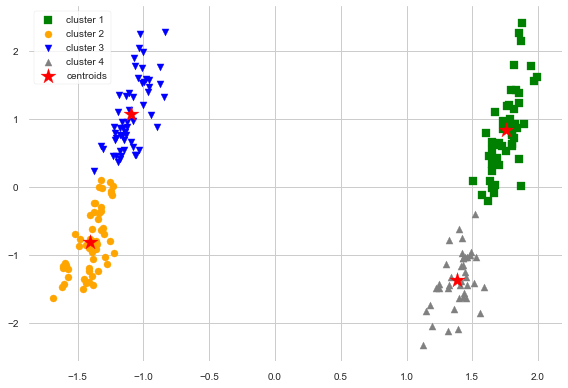

In [21]:
X=Z
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='green', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='blue', 
            marker='v', 
            label='cluster 3')
plt.scatter(X[y_km==3,0], 
            X[y_km==3,1], 
            s=50, 
            c='grey', 
            marker='^', 
            label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

As one can see, 4 clusters were created.

Now I create a silhouette plot:

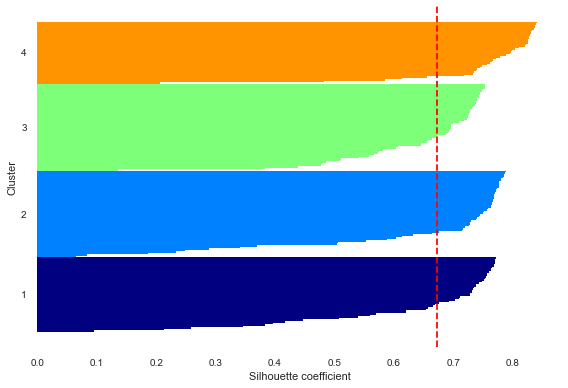

In [22]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [23]:
#labels
y_km

array([3, 3, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3])

In [24]:
#Add labels to original data
df['ClusterLabel'] = y_km
prepdf['ClusterLabel'] = y_km

## Interpretation and characterisation of the data

In [25]:
#Group data by clusters and get a first overview with median()
df.groupby(['ClusterLabel']).median()

,Age,Annual_Income_(k$),Spending_Score_(1-100)
ClusterLabel,,,
0,48.5,62.5,32.0
1,29.5,62.5,73.0
2,48.0,55.5,39.5
3,28.0,63.0,73.0


In [26]:
#Data with gender
prepdf.groupby(['ClusterLabel']).median()

,Age,Annual_Income_(k$),Spending_Score_(1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,48.5,62.5,32.0,0,1
1,29.5,62.5,73.0,1,0
2,48.0,55.5,39.5,1,0
3,28.0,63.0,73.0,0,1


In [27]:
#DData with gender
prepdf.groupby(['ClusterLabel']).mean()

,Age,Annual_Income_(k$),Spending_Score_(1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,49.437500,62.416667,29.208333,0,1
1,28.392857,60.428571,68.178571,1,0
2,47.803571,58.071429,34.875000,1,0
3,28.250000,62.000000,71.675000,0,1


#### As you can see from the data, 4 clusters were created. The 4 clusters can be interpreted in the following way:
1. cluster 0: Older persons (male) with higher income but less willingness to spend
2. cluster 1: Younger people (female) with higher income and a high willingness to spend
3. cluster 2: Older people (female) with medium income and less willingness to spend 
4. cluster 3: Younger persons (male) with higher income and a high willingness to spend

In [28]:
#Set index cluster label
df = df.reset_index()
df = df.set_index('ClusterLabel')

prepdf = prepdf.reset_index()
prepdf = prepdf.set_index('ClusterLabel')
#prepdf.drop('CustomerID', axis=1, inplace=True)

Interpretation of the data by plots:

ClusterLabel
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

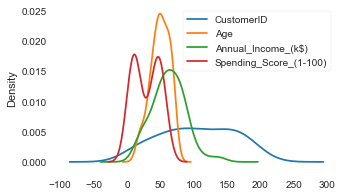

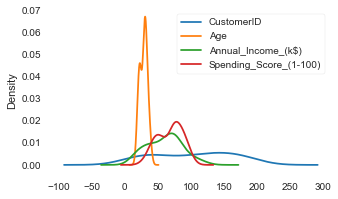

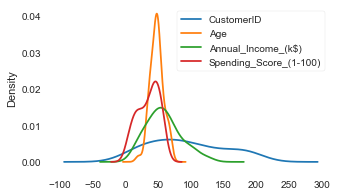

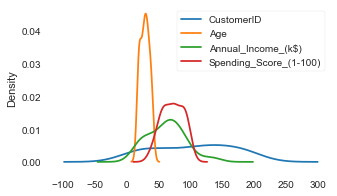

In [29]:
#Here one can see the densities of the respective clusters and features
#df.drop(['CustomerID'], axis=1, inplace=True)
df.groupby(['ClusterLabel']).plot(kind='kde', figsize=(5,3))

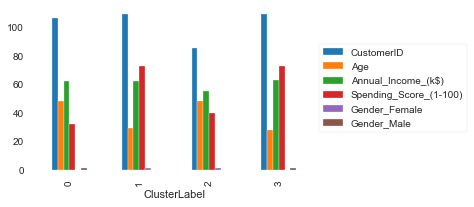

In [30]:
#One can still display bar charts of the individual clusters

#prepdf.drop(['CustomerID'], axis=1, inplace=True)
plotdf = prepdf.groupby(['ClusterLabel']).median()
plotdf.plot(kind='bar', figsize=(5,3))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#prepdf.iloc[[6]].plot(kind='bar', figsize=(5,5))

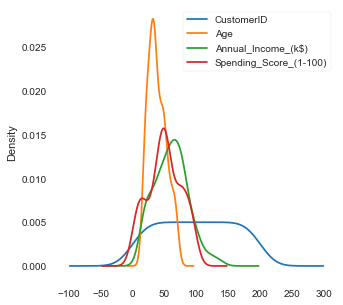

In [31]:
df.plot(kind='kde', figsize=(5,5))
#df.plot(kind='kde', figsize=(10,10))

ClusterLabel
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

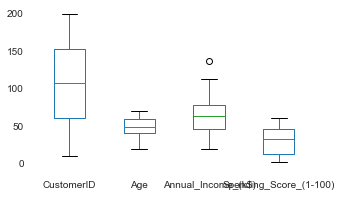

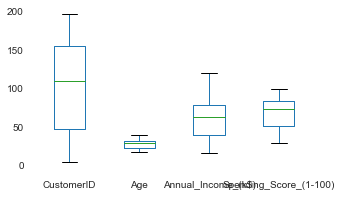

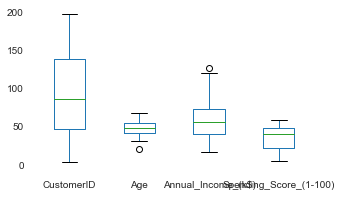

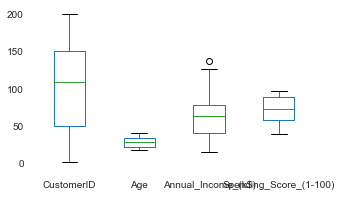

In [32]:
df.groupby(['ClusterLabel']).plot(kind='box', figsize=(5,3))

# Crisp DM Process


The CrispDM Model Process consists of the following phases:
1. Business Understanding, 2. Data Understanding, 3. Data Preparation, 4. Modeling, 5. Evaluation, 6. Deployment

In this mini-project the phases were implemented as follows:

1. business understanding = an economic objective was set in the task "A shopping center wants to better understand who shops there in order to be able to form customer groups on this basis and then address them more individually."
2. data understanding = data inspection and understanding was carried out
3. data preparation = was also done e.g. remove blanks, remove NaN values, set index, string values replaced with dummy columns
4. modeling = clustering method was applied with the optimal number of clusters
5. evaluation = was also carried out e.g. interpretation of the cluster through plots and groupby statements
6. deployment = has not yet been implemented in this case. Here one could make a final presentation or final report and present it to the bosses of the shopping center, possibly with tips on how to address these "buyer groups"